## For Modelling I used an available cleaned data from a github repo

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./dataset/skindataall.csv', index_col=0)

In [3]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [4]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
profile.to_file("SkinData_report.json")

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8649 entries, 0 to 8702
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Username             8649 non-null   object 
 1   Skin_Tone            8649 non-null   object 
 2   Skin_Type            8649 non-null   object 
 3   Eye_Color            8649 non-null   object 
 4   Hair_Color           8649 non-null   object 
 5   Rating_Stars         8649 non-null   int64  
 6   Review               8649 non-null   object 
 7   Product              8649 non-null   object 
 8   Brand                8649 non-null   object 
 9   Price                8649 non-null   int64  
 10  Rating               8649 non-null   float64
 11  Ingredients          8649 non-null   object 
 12  Combination          8649 non-null   int64  
 13  Dry                  8649 non-null   int64  
 14  Normal               8649 non-null   int64  
 15  Oily                 8649 non-null   i

In [86]:
df.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
1      PatTea    Medium  Combination     Brown        Red             1   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   

                                              Review  \
0  This is hands down the best cleanser I’ve ever...   
1  Unfortunately this doesn’t work for everyone. ...   
2  My favorite cleanser!! i love the packaging on...   
3  I love all things Youth To The People! This cl...   
4  I had a trial size of this and was obsessed. M...   

                          Product                Brand  Price  ...  Oily  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
1  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   

  Sensitive  Category                                        Product_Url  \
0         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
1         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
2         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
3         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
4         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   

   User_id  Product_id                                Ingredients_Cleaned  \
0     3420         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
1     2483         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
2     2715         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
3     4497         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
4     5017         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   

                                      Review_Cleaned Good_Stuff  \
0  ['hand', 'best', 'cleanser', 'ever', 'used', '...          1   
1  ['unfortunately', 'work', 'everyone', 'used', ...          0   
2  ['favorite', 'cleanser', 'love', 'packaging', ...          1   
3  ['love', 'thing', 'youth', 'people', 'cleanser...          1   
4  ['trial', 'size', 'wa', 'obsessed', 'skin', 'f...          1   

                                           Ing_Tfidf  
0  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
1  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
2  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
3  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
4  sodium, cocoyl, glutamate, cocamidopropyl, bet...  

[5 rows x 25 columns]

## Recommend products based on similar users

(315, 1)
                                                    Rating_Stars
Product                                                         
+Retinol Vita C Power Serum                                  4.0
100 percent Pure Argan Oil                                   3.2
100 percent Pure Argan Oil Light                             4.2
3 Muslin Cloths                                              4.3
3% Glycolic Solutions Cleanser                               4.5
5 in 1 Face Cream SPF 30                                     4.0
7 Day Scrub Cream Rinse-Off Formula                          4.6
8% Glycolic Solutions Toner                                  3.9
A Perfect World™ Age-Defense Treatment Lotion w...           4.2
AHA/BHA Acne Clearing Gel                                    3.6


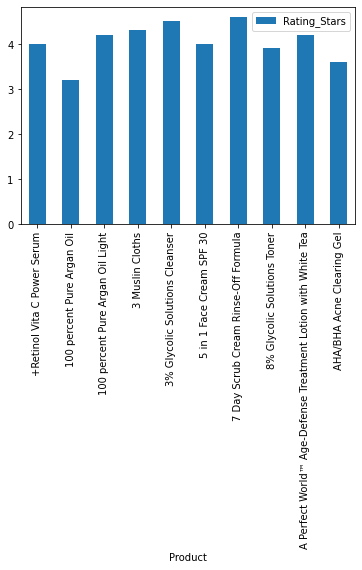

In [7]:
# Get mean from available data
ratings = pd.DataFrame(df.groupby('Product')['Rating_Stars'].mean().round(1))
print(ratings.shape)
print(ratings.head(10))
ratings.iloc[:10].plot.bar();

In [8]:
print(ratings[ratings['Rating_Stars'] == 0.0])

Empty DataFrame
Columns: [Rating_Stars]
Index: []


                                                    Rating
Product                                                   
+Retinol Vita C Power Serum                            3.9
100 percent Pure Argan Oil                             4.5
100 percent Pure Argan Oil Light                       4.4
3 Muslin Cloths                                        4.3
3% Glycolic Solutions Cleanser                         4.4
5 in 1 Face Cream SPF 30                               3.9
7 Day Scrub Cream Rinse-Off Formula                    4.6
8% Glycolic Solutions Toner                            4.3
A Perfect World™ Age-Defense Treatment Lotion w...     4.5
AHA/BHA Acne Clearing Gel                              0.0


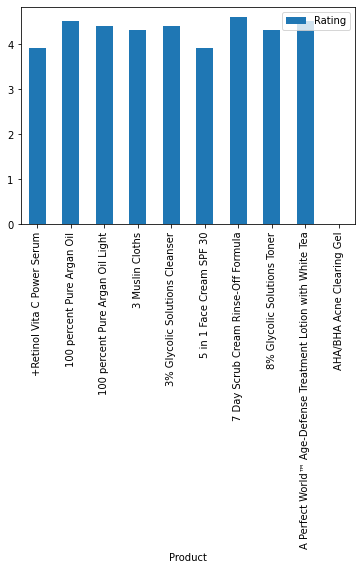

In [9]:
# Get mean from total data on the web
avg_rating = pd.DataFrame(df.groupby('Product')['Rating'].mean())
print(avg_rating.head(10))
avg_rating.iloc[:10].plot.bar();

In [10]:
print(avg_rating[avg_rating['Rating'] == 0.0])

                           Rating
Product                          
AHA/BHA Acne Clearing Gel     0.0
Clarifying Toner              0.0


#### The available ratings data is much cleaner then the scraped ratings data

In [11]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('Product')['Rating_Stars'].count())
ratings.head()

Rating_Stars  num of ratings
Product                                                       
+Retinol Vita C Power Serum                4.0              24
100 percent Pure Argan Oil                 3.2              24
100 percent Pure Argan Oil Light           4.2              24
3 Muslin Cloths                            4.3              24
3% Glycolic Solutions Cleanser             4.5              24

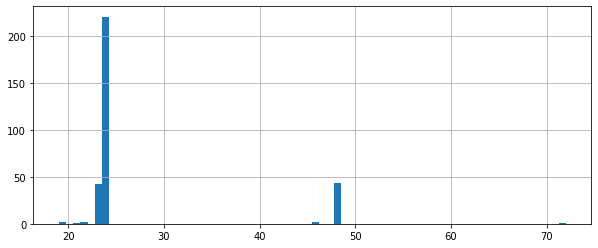

In [12]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70);

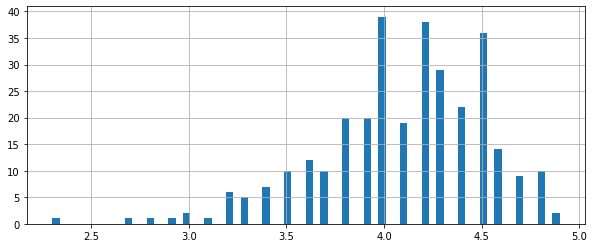

In [13]:
plt.figure(figsize=(10,4))
ratings['Rating_Stars'].hist(bins=70);

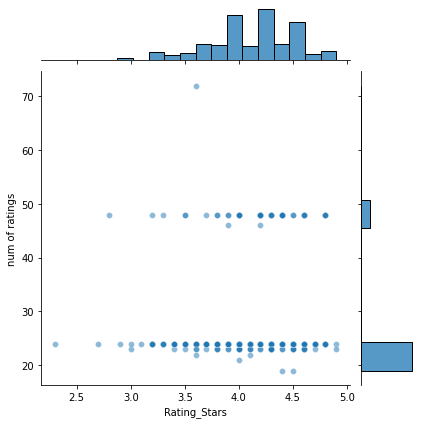

In [14]:
sns.jointplot(x='Rating_Stars',y='num of ratings',data=ratings,alpha=0.5);

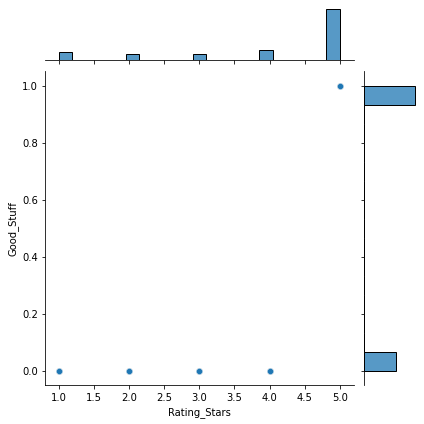

In [15]:
sns.jointplot(x='Rating_Stars',y='Good_Stuff',data=df,alpha=0.5);

### Recommending Similar Products

Now let's create a matrix that has the user ids on one access and the product name on another axis. Each cell will then consist of the rating the user gave to that product. Note there will be a lot of NaN values, because no one buys every product available.

In [16]:
prodmat = df.pivot_table(index='Username', columns='Product', values='Rating_Stars')
prodmat.head()

Product      +Retinol Vita C Power Serum  100 percent Pure Argan Oil  \
Username                                                               
007CatWomen                          NaN                         NaN   
007DCUL                              NaN                         NaN   
050583                               NaN                         NaN   
0Loren0                              NaN                         NaN   
11Makeup11                           NaN                         NaN   

Product      100 percent Pure Argan Oil Light  3 Muslin Cloths  \
Username                                                         
007CatWomen                               NaN              NaN   
007DCUL                                   NaN              NaN   
050583                                    NaN              NaN   
0Loren0                                   NaN              NaN   
11Makeup11                                NaN              NaN   

Product      3% Glycolic Solutions Cleanser  5 in 1 Face Cream SPF 30  \
Username                                                                
007CatWomen                             NaN                       NaN   
007DCUL                                 NaN                       NaN   
050583                                  NaN                       NaN   
0Loren0                                 NaN                       NaN   
11Makeup11                              NaN                       NaN   

Product      7 Day Scrub Cream Rinse-Off Formula  8% Glycolic Solutions Toner  \
Username                                                                        
007CatWomen                                  NaN                          NaN   
007DCUL                                      NaN                          NaN   
050583                                       NaN                          NaN   
0Loren0                                      NaN                          NaN   
11Makeup11                                   NaN                          NaN   

Product      A Perfect World™ Age-Defense Treatment Lotion with White Tea  \
Username                                                                    
007CatWomen                                                NaN              
007DCUL                                                    NaN              
050583                                                     NaN              
0Loren0                                                    NaN              
11Makeup11                                                 NaN              

Product      AHA/BHA Acne Clearing Gel  ...  \
Username                                ...   
007CatWomen                        NaN  ...   
007DCUL                            NaN  ...   
050583                             NaN  ...   
0Loren0                            NaN  ...   
11Makeup11                         NaN  ...   

Product      Vitamin Nectar Antioxidant Face Mist  Water Bank Moisture Cream  \
Username                                                                       
007CatWomen                                   NaN                        NaN   
007DCUL                                       NaN                        NaN   
050583                                        NaN                        NaN   
0Loren0                                       NaN                        NaN   
11Makeup11                                    NaN                        NaN   

Product      Water Drench Hyaluronic Cloud Cream  \
Username                                           
007CatWomen                                  NaN   
007DCUL                                      NaN   
050583                                       NaN   
0Loren0                                      NaN   
11Makeup11                                   NaN   

Product      Water Drench Hyaluronic Cloud Serum  \
Username                                           
007CatWomen                                  NaN   


In [17]:
ratings.sort_values('num of ratings', ascending=False).head(10)

Rating_Stars  \
Product                                                            
Beauty Elixir                                                3.6   
Take The Day Off Makeup Remover For Lids, Lashe...           4.5   
Beste™ No. 9 Jelly Cleanser                                  3.7   
Bi-Facil Double-Action Eye Makeup Remover                    4.8   
Transforming Walnut Scrub                                    4.2   
Time Release Acne Cleanser                                   4.6   
Rose Floral Toner                                            3.8   
The Rice Polish Foaming Enzyme Powder                        4.8   
Calendula Herbal Extract Alcohol Free Toner                  4.3   
Checks and Balances™ Frothy Face Wash                        4.2   

                                                    num of ratings  
Product                                                             
Beauty Elixir                                                   72  
Take The Day Off Makeup Remover For Lids, Lashe...              48  
Beste™ No. 9 Jelly Cleanser                                     48  
Bi-Facil Double-Action Eye Makeup Remover                       48  
Transforming Walnut Scrub                                       48  
Time Release Acne Cleanser                                      48  
Rose Floral Toner                                               48  
The Rice Polish Foaming Enzyme Powder                           48  
Calendula Herbal Extract Alcohol Free Toner                     48  
Checks and Balances™ Frothy Face Wash                           48

In [18]:
ratings.head()

Rating_Stars  num of ratings
Product                                                       
+Retinol Vita C Power Serum                4.0              24
100 percent Pure Argan Oil                 3.2              24
100 percent Pure Argan Oil Light           4.2              24
3 Muslin Cloths                            4.3              24
3% Glycolic Solutions Cleanser             4.5              24

In [19]:
retinol_user_ratings = prodmat['+Retinol Vita C Power Serum']
retinol_user_ratings.sort_values(ascending=False)

Username
Angela1979    5.0
ZosiaT        5.0
mrc34         5.0
mblog         5.0
lkap13        5.0
             ... 
zoi00         NaN
zonglu        NaN
zoya2000      NaN
zozosweet     NaN
zq5li         NaN
Name: +Retinol Vita C Power Serum, Length: 6851, dtype: float64

In [20]:
similar_to_retinol = prodmat.corrwith(retinol_user_ratings)

In [21]:
corr_retinol = pd.DataFrame(similar_to_retinol,columns=['Correlation'])
corr_retinol.dropna(inplace=True)
corr_retinol.sort_values('Correlation',ascending=False).head(10)

Correlation
Product                                 
+Retinol Vita C Power Serum          1.0

In [22]:
three_muslin_user_ratings = prodmat['3 Muslin Cloths']
three_muslin_user_ratings.sort_values(ascending=False)

Username
AlexusF       5.0
Taurus1971    5.0
nadsky        5.0
krissy5900    5.0
kaesha        5.0
             ... 
zoi00         NaN
zonglu        NaN
zoya2000      NaN
zozosweet     NaN
zq5li         NaN
Name: 3 Muslin Cloths, Length: 6851, dtype: float64

In [23]:
similar_to_three_muslin = prodmat.corrwith(three_muslin_user_ratings)

In [24]:
corr_three_muslin = pd.DataFrame(similar_to_three_muslin,columns=['Correlation'])
corr_three_muslin.dropna(inplace=True)
corr_three_muslin.sort_values('Correlation',ascending=False).head(10)

Correlation
Product                     
3 Muslin Cloths          1.0

#### These results are expected because users will not buy products purely based on ratings only. There are the factors that we need to look into to model a better recommender

# Add other User Features 

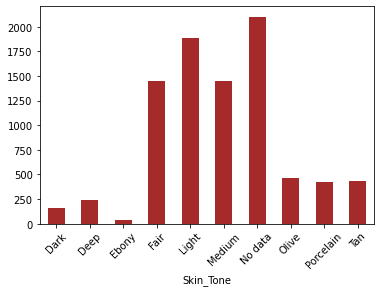

In [25]:
skintone_stats = df.groupby('Skin_Tone')['Username'].count()
skintone_stats.plot.bar(color = 'brown', rot=45);

<AxesSubplot:xlabel='Skin_Type'>

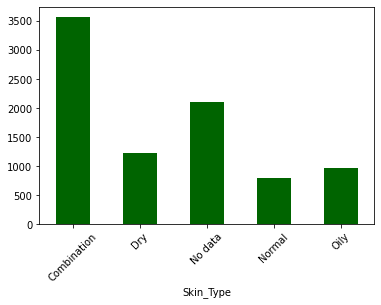

In [26]:
skintype_stats = df.groupby('Skin_Type')['Username'].count()
skintype_stats.plot.bar(color = 'darkgreen', rot=45)

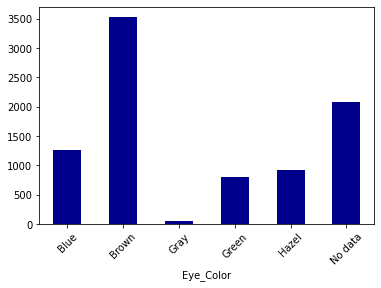

In [27]:
eyecolor_stats = df.groupby('Eye_Color')['Username'].count()
eyecolor_stats.plot.bar(color = 'darkblue', rot=45);

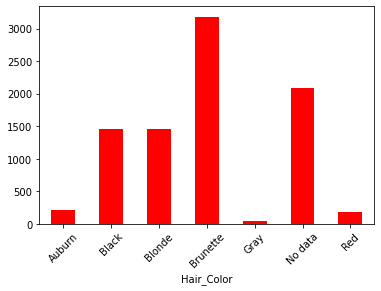

In [28]:
haircolor_stats = df.groupby('Hair_Color')['Username'].count()
haircolor_stats.plot.bar(color = 'red', rot=45);

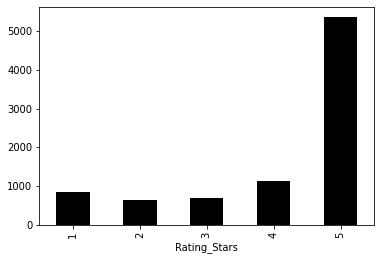

In [29]:
rating_stats = df.groupby('Rating_Stars')['Username'].count()
rating_stats.plot.bar(color = 'black');

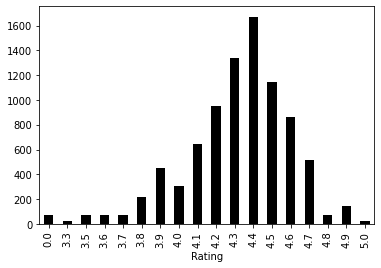

In [30]:
rating_ = df.groupby('Rating')['Username'].count()
rating_.plot.bar(color = 'black');

In [31]:
import nltk
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [32]:
negative_df = df[df.Rating_Stars <= 4]
positive_df = df[df.Rating_Stars > 4]
negative = " ".join(review for review in negative_df.Review)
positive = " ".join(review for review in positive_df.Review)

In [33]:
stopwords = set(STOPWORDS)
stopwords.update(['read', 'more', 'product', 'skin', 'face', 'use', 'used', 'using', 'feel', 's', 'really',
                 'one', 'cleanser', 'moisturizer'])

In [34]:
def generate_wordcloud(data):
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", 
                          collocation_threshold = 50).generate(data)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

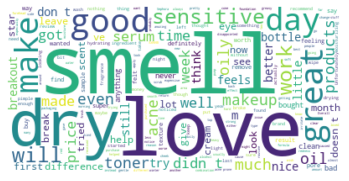

In [35]:
generate_wordcloud(negative)

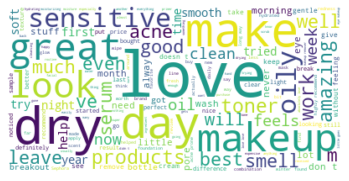

In [36]:
generate_wordcloud(positive)

In [37]:
moist_df = df[df.Category == 'Moisturizer']
cleanse_df = df[df.Category == 'Cleanser']
mask_df = df[df.Category == 'Face Mask']
treat_df = df[df.Category == 'Treatment']

In [38]:
moist = " ".join(ing for ing in moist_df.Ingredients)
cleanse = " ".join(ing for ing in cleanse_df.Ingredients)
mask = " ".join(ing for ing in mask_df.Ingredients)
treat = " ".join(ing for ing in treat_df.Ingredients)

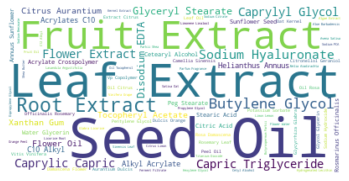

In [39]:
generate_wordcloud(moist)

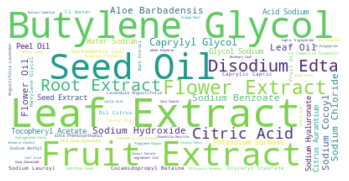

In [40]:
generate_wordcloud(cleanse)

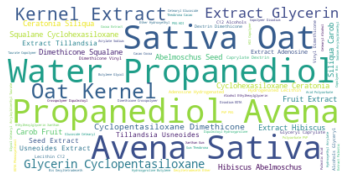

In [41]:
generate_wordcloud(mask)

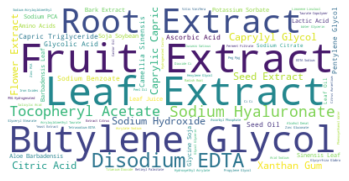

In [42]:
generate_wordcloud(treat)

## Classify different products by ingredient

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 

from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [44]:
X = df.Ingredients
y = df.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [45]:
categories = ['Moisturizer', 'Cleanser', 'Face Mask', 'Treatment']

In [46]:
#Naive Bayes
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.9653259361997226
              precision    recall  f1-score   support

 Moisturizer       0.96      0.99      0.98      1031
    Cleanser       0.00      0.00      0.00         9
   Face Mask       0.99      0.96      0.98       649
   Treatment       0.94      0.92      0.93       474

    accuracy                           0.97      2163
   macro avg       0.72      0.72      0.72      2163
weighted avg       0.96      0.97      0.96      2163



In [47]:
#Logistic Regression
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.9833564493758669
              precision    recall  f1-score   support

 Moisturizer       0.99      0.97      0.98      1031
    Cleanser       1.00      1.00      1.00         9
   Face Mask       0.97      1.00      0.98       649
   Treatment       0.98      0.99      0.98       474

    accuracy                           0.98      2163
   macro avg       0.99      0.99      0.99      2163
weighted avg       0.98      0.98      0.98      2163



## Quality and effectiveness check

What makes a user give a five star rating to a product? Probably visible results of using it. If a woman buys a cream that erases her wrinkes after a week of using it, it is expected that she will go to the website and write a positive review. But what makes a high quality product? Define not the package -- it's ingredients that work! Can we predict whether or not the product will get a 5 star rating just using its ingredient list?

In [48]:
X1 = df.Ingredients
y1 = df.Good_Stuff
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state = 42)

In [49]:
cat = ['1', '0']

In [50]:
#Naive Bayes
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train1, y_train1)

y_pred1 = nb.predict(X_test1)

print('accuracy %s' % accuracy_score(y_pred1, y_test1))
print('\n')
print(classification_report(y_test1, y_pred1, target_names=cat))

accuracy 0.5973185390661119


              precision    recall  f1-score   support

           1       0.48      0.25      0.33       856
           0       0.63      0.82      0.71      1307

    accuracy                           0.60      2163
   macro avg       0.56      0.54      0.52      2163
weighted avg       0.57      0.60      0.56      2163



In [51]:
#Logistic Regression
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train1, y_train1)


y_pred1 = logreg.predict(X_test1)

print('accuracy %s' % accuracy_score(y_pred1, y_test1))
print('\n')
print(classification_report(y_test1, y_pred1, target_names=cat))

accuracy 0.603791030975497


              precision    recall  f1-score   support

           1       0.50      0.25      0.33       856
           0       0.63      0.84      0.72      1307

    accuracy                           0.60      2163
   macro avg       0.56      0.54      0.53      2163
weighted avg       0.58      0.60      0.57      2163



In [52]:
#SVG with SGD
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train1, y_train1)

y_pred1 = sgd.predict(X_test1)

print('accuracy %s' % accuracy_score(y_pred1, y_test1))
print('\n')
print(classification_report(y_test1, y_pred1, target_names=cat))

accuracy 0.6116504854368932


              precision    recall  f1-score   support

           1       0.61      0.05      0.09       856
           0       0.61      0.98      0.75      1307

    accuracy                           0.61      2163
   macro avg       0.61      0.51      0.42      2163
weighted avg       0.61      0.61      0.49      2163



Surprisingly, none of the models could predict the quality/effectiveness with good accuracy. This can be easily explained by the fact that a lot of people remove one star from the rating because of the high price. We want to keep this in mind when we are recommending the products.

## Modeling recommenders

In [53]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate 
from surprise.model_selection import train_test_split as tts
from surprise.model_selection import RandomizedSearchCV

In [54]:
data = df[['User_id', 'Product_id', 'Rating']]
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_df(data, reader=reader)

trainset, testset = tts(data, test_size=.2)

In [55]:
svd = SVD()
trainset = svd.fit(trainset)

In [56]:
svd.qi.shape

(315, 100)

In [57]:
test_pred = svd.test(testset)
accuracy.rmse(test_pred)
accuracy.mae(test_pred)

RMSE: 0.1288
MAE:  0.0704


0.07041607316108181

## Recommender that uses the customer features only to recommend the products

In [82]:
def recommend_products_by_user_features(skintone, skintype, eyecolor, haircolor, percentile=0.85):
    ddf = df[(df['Skin_Tone'] == skintone) & (df['Hair_Color'] == haircolor) & (df['Skin_Type'] == skintype) & (df['Eye_Color'] == eyecolor)]
    
    recommendations = ddf[(ddf['Rating_Stars'].notnull())][['Rating_Stars', 'Product_Url', 'Product']]
    recommendations = recommendations.sort_values('Rating_Stars', ascending=False).head(10)
    
    print('Based on your features, these are the top products for you:')
    return recommendations

In [83]:
recommend_products_by_user_features('Light', 'Combination', 'Green', 'Brunette')


Based on your features, these are the top products for you:


Rating_Stars                                        Product_Url  \
349              5  https://www.sephora.com/product/bi-facil-doubl...   
1977             5  https://www.sephora.com/product/ultimate-mirac...   
2800             5  https://www.sephora.com/product/aqua-bomb-slee...   
2918             5  https://www.sephora.com/product/vitamin-c-anti...   
2944             5  https://www.sephora.com/product/peat-miracle-r...   
2998             5  https://www.sephora.com/product/gold-camellia-...   
350              5  https://www.sephora.com/product/bi-facil-doubl...   
3525             5  https://www.sephora.com/product/the-cleansing-...   
3999             5  https://www.sephora.com/product/clean-bee-ultr...   
4069             5  https://www.sephora.com/product/time-release-a...   

                                                Product  
349           Bi-Facil Double-Action Eye Makeup Remover  
1977  Ultimate Miracle Worker Multi-Rejuvenating Cre...  
2800                            Aqua Bomb Sleeping Mask  
2918               Vitamin Nectar Antioxidant Face Mist  
2944                         Peat Miracle Revital Cream  
2998                           Gold Camellia Beauty Oil  
350           Bi-Facil Double-Action Eye Makeup Remover  
3525                                 The Cleansing Foam  
3999             Clean Bee Ultra Gentle Facial Cleanser  
4069                         Time Release Acne Cleanser

## Collaborative filtering with Lightfm

In [61]:
from scipy import sparse
from lightfm import LightFM
from sklearn.metrics.pairwise import cosine_similarity
from lightfm.evaluation import auc_score
from lightfm.evaluation import precision_at_k,recall_at_k

In [62]:
def create_interaction_matrix(df, user_col, item_col, rating_col, norm= False, threshold = None):
    interactions = df.groupby([user_col, item_col])[rating_col].sum().unstack().reset_index().fillna(0).set_index(user_col)
    if norm:
        interactions = interactions.applymap(lambda x: 1 if x > threshold else 0)
    return interactions

In [63]:
interaction_matrix = create_interaction_matrix(df=df, user_col='User_id', item_col = 'Product_id', rating_col='Rating_Stars')
interaction_matrix.head()

Product_id  0    1    2    3    4    5    6    7    8    9    ...  305  306  \
User_id                                                       ...             
0           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

Product_id  307  308  309  310  311  312  313  314  
User_id                                             
0           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 315 columns]

In [64]:
def runMF(interactions, n_components=30, loss='warp', k=15, epoch=30,n_jobs = 4):
    x = sparse.csr_matrix(interactions.values)
    model = LightFM(no_components= n_components, loss=loss,k=k)
    model.fit(x,epochs=epoch,num_threads = n_jobs)
    train_auc = auc_score(model, x, num_threads=n_jobs).mean()
    print('Collaborative filtering AUC: %s' % train_auc)
    print("Train precision: %.4f" % precision_at_k(model, x, k=k,num_threads=n_jobs).mean())

    return model

In [65]:
mf_model = runMF(interactions = interaction_matrix,
                 n_components = 30,
                 loss = 'warp',
                 epoch = 30,
                 n_jobs = 4)

Collaborative filtering AUC: 0.9999995
Train precision: 0.0729


In [66]:
def create_user_dict(interactions):
    user_id = list(interactions.index)
    user_dict = {}
    counter = 0 
    for i in user_id:
        user_dict[i] = counter
        counter += 1
    return user_dict

In [67]:
user_dict = create_user_dict(interaction_matrix)

In [68]:
def create_item_dict(df, id_col, name_col):
    item_dict ={}
    for i in df.index:
        item_dict[(df.loc[i, id_col])] = df.loc[i, name_col]
    return item_dict

In [69]:
product_dict = create_item_dict(df = df, id_col = 'Product_id', name_col = 'Product')

In [70]:
def sample_recommendation_user(model, interactions, user_id, user_dict,
                               item_dict, threshold = 0, nrec_items = 10, show = True):

    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))

    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                 [interactions.loc[user_id,:] > threshold].index).sort_values(ascending=False))
    #print(scores)
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    #print(return_score_list)
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))

    if show == True:
        print(scores)

    return scores 

In [71]:
rec_list = sample_recommendation_user(model = mf_model, 
                                      interactions = interaction_matrix, 
                                      user_id = 4792, 
                                      user_dict = user_dict,
                                      item_dict = product_dict, 
                                      threshold = 4,
                                      nrec_items = 10,
                                      show = True)

['Bio Retinoid Anti-Wrinkle Concentrate Oil', 'Ultra Repair® Cream Intense Hydration', 'Vine[activ] Overnight Detox Oil', 'Renewing Cleansing Cream', 'ExfoliKate® Cleanser Daily Foaming Wash', 'Ferulic + Retinol Wrinkle Recovery Overnight Serum', 'Benefiance NutriPerfect Night Cream', 'Ferulic Acid + Retinol Brightening Solution', 'Lotus Youth Preserve Moisturizer', 'Deep Cleansing Exfoliator']


## Content-based recommendations using Ingredients of the product

In [72]:
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [73]:
df_cont = df[['Product', 'Product_id', 'Ingredients', 'Product_Url', 'Ing_Tfidf', 'Rating']]
df_cont.drop_duplicates(inplace=True)

In [74]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df_cont['Ingredients'])

In [75]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [76]:
df_cont = df_cont.reset_index(drop=True)
titles = df_cont[['Product', 'Ing_Tfidf', 'Rating']]
indices = pd.Series(df_cont.index, index=df_cont['Product'])

In [77]:
def content_recommendations(product):
    idx = indices[product]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    product_indices = [i[0] for i in sim_scores]
    return titles.iloc[product_indices]

In [85]:
content_recommendations('Lotus Youth Preserve Moisturizer')

Product  \
177                      Soy Face Cleansing Milk   
58                    Vitamin C Glow Moisturizer   
73   Hyaluronic Marine Oil-Free Moisture Cushion   
290      Ferulic + Retinol Wrinkle Recovery Peel   
71      Ferulic + Retinol Anti-Aging Moisturizer   
87          Vitamin Nectar Antioxidant Face Mist   
119                     Anti-Aging Cleansing Gel   
208                      Hydrating Essence Toner   
231       Plantscription™ Anti-Aging Power Serum   
40       Goodnight Glow Retin-ALT Sleeping Crème   

                                             Ing_Tfidf  Rating  
177  caprylic, capric, triglyceride, caprylic, capr...     3.9  
58   glycerin, pentylene, glycol, ethylhexyl, isono...     4.3  
73   cyclopentasiloxane, cetearyl, alcohol, dimethi...     4.2  
290  hamamelis, virginiana, witch, hazel, sd, alcoh...     4.4  
71   dimethicone, cyclopentasiloxane, isododecane, ...     4.1  
87   glycerin, penty, lene, glycol, peg, hydrogenat...     4.8  
119  sodium, laureth, sulfate, cocamidopropyl, beta...     4.4  
208  butylene, glycol, sodium, pca, hamamelis, virg...     4.4  
231  butylene, glycol, dimethicone, jojoba, ester, ...     3.9  
40   glycerin, vitis, vinifera, grape, seed, oil, c...     4.3

### Conclusion & Future Works: 

It's a lot of fun building a recommender app for a product brand. Gathering feedback from other users for evaluation is key.

1. All three models require different inputs.
2. Collaborative Filtering based on User Id is not recommended because it's hard to find the specific user id.
3. Due to small data some user features only recommend a few products if not any.


### In future works:

1. Gathering feedback of the best recommender system is required.
2. Collect more data to get more accurate results
3. Upgrade input data to identify text image for unlisted products
4. Collaborate iwth business goals.